# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [74]:
import numpy as np
import pandas as pd
from sys import exit
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [75]:
penguins = load_penguins()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [76]:
penguins = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'sex', 'species', 'island'])
cols_species_island = pd.get_dummies(penguins[['species', 'island']])
cols_sex = pd.get_dummies(penguins['sex'], drop_first=True)
df = penguins.drop(['species', 'island', 'sex'], axis=1)
df = pd.concat([df, cols_species_island, cols_sex], axis=1)
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,male
0,39.1,18.7,181.0,3750.0,2007,1,0,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,2007,1,0,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,2007,1,0,0,0,0,1,0
4,36.7,19.3,193.0,3450.0,2007,1,0,0,0,0,1,0
5,39.3,20.6,190.0,3650.0,2007,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,0,1,0,0,1,0,1
340,43.5,18.1,202.0,3400.0,2009,0,1,0,0,1,0,0
341,49.6,18.2,193.0,3775.0,2009,0,1,0,0,1,0,1
342,50.8,19.0,210.0,4100.0,2009,0,1,0,0,1,0,1


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [77]:
X = df.drop('bill_depth_mm', axis=1)
y = df['bill_depth_mm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [78]:
Cubic_model = Pipeline([
        ('poly', PolynomialFeatures(degree=3)),
        ('ols', LinearRegression())
    ])

Cubic_model.fit(X_train, y_train)
y_cubic_train = Cubic_model.predict(X_train)
y_cubic_test = Cubic_model.predict(X_test)
train_error = mean_squared_error(y_train, Cubic_model.predict(X_train))
test_error = mean_squared_error(y_test, Cubic_model.predict(X_test))
print(f"Cubic Model : : {train_error, test_error}")

Cubic Model : : (0.25545900831518176, 1.9318221726908247)


In [79]:
knn_model_1 = KNeighborsRegressor(n_neighbors=5)
knn_model_2 = KNeighborsRegressor(n_neighbors=10)
knn_model_1.fit(X_train, y_train)
knn_model_2.fit(X_train, y_train)
train_error1 = mean_squared_error(y_train, knn_model_1.predict(X_train))
test_error1 = mean_squared_error(y_test, knn_model_1.predict(X_test))
train_error2 = mean_squared_error(y_train, knn_model_2.predict(X_train))
test_error2 = mean_squared_error(y_test, knn_model_2.predict(X_test))
print(f"KNN with N = 5 : {train_error1, test_error1}")
print(f"KNN with N = 10 : {train_error2, test_error2}")

KNN with N = 5 : (1.7774682730923699, 1.6908714285714288)
KNN with N = 10 : (1.9581220883534136, 1.6496059523809532)


In [80]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

train_error3 = mean_squared_error(y_train, decision_tree_model.predict(X_train))
test_error3 = mean_squared_error(y_test, decision_tree_model.predict(X_test))
print(f"Decision Tree : {train_error3, test_error3}")

Decision Tree : (0.0, 1.338452380952381)


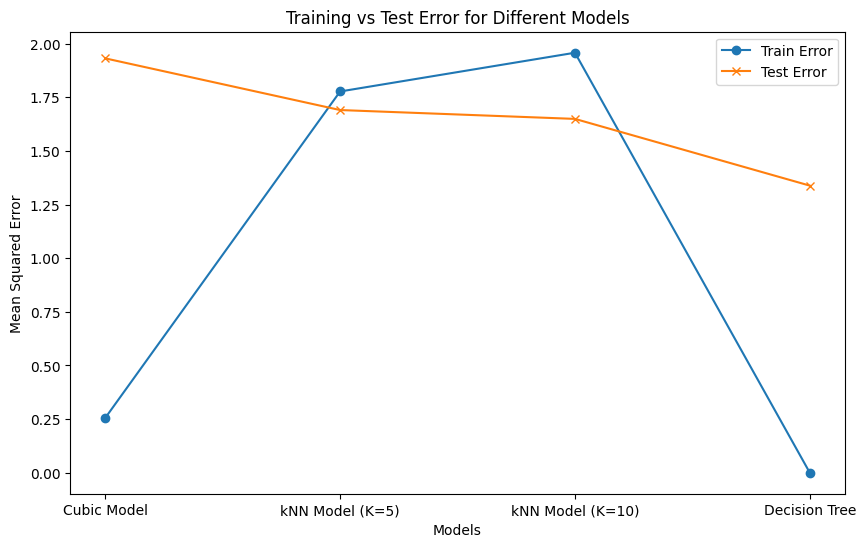

In [81]:
models = {
    'Cubic Model': Cubic_model,
    'kNN Model (K=5)': knn_model_1,
    'kNN Model (K=10)': knn_model_2,
    'Decision Tree': decision_tree_model
}

errors = {}
for name, model in models.items():
    train_error = mean_squared_error(y_train, model.predict(X_train))
    test_error = mean_squared_error(y_test, model.predict(X_test))
    errors[name] = (train_error, test_error)

model_names = list(errors.keys())
train_errors = [errors[name][0] for name in model_names]
test_errors = [errors[name][1] for name in model_names]

plt.figure(figsize=(10, 6))
plt.plot(model_names, train_errors, label='Train Error', marker='o')
plt.plot(model_names, test_errors, label='Test Error', marker='x')

plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Training vs Test Error for Different Models')
plt.legend()
plt.show()


The best model is Decision Tree with a test error of 1.33